In [1]:
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from tabulate import tabulate

GUTENDEX_API_BASE_URL = 'https://gutendex.com'
author_year_start = 1808
author_year_end = 1890
gutendex_url = f'{GUTENDEX_API_BASE_URL}/books?author_year_start={author_year_start}&author_year_end={author_year_end}'

# Create a retry session for API requests
retry_strategy = Retry(
    total=5,
    backoff_factor=2,
    status_forcelist=[429, 500, 502, 503, 504],
)
adapter = HTTPAdapter(max_retries=retry_strategy)
http = requests.Session()
http.mount("https://", adapter)
http.mount("http://", adapter)

# Fetch book text using the Gutendex API
def fetch_book_text(book_id):
    url = f'{GUTENDEX_API_BASE_URL}/books/{book_id}'
    try:
        response = http.get(url)
        response.raise_for_status()
        book_data = response.json()
        return book_data.get('formats', {}).get('text/plain'), book_data
    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch book {book_id} text: {e}")
    return None, None

# Fetch all book IDs from the Gutendex API
def fetch_all_book_ids():
    try:
        response = http.get(gutendex_url)
        response.raise_for_status()
        books_data = response.json()
        return [book['id'] for book in books_data['results']]
    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch book IDs: {e}")
    return []

# Perform sentiment analysis using TextBlob
def analyze_sentiment_textblob(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

# Perform sentiment analysis using NLTK
def analyze_sentiment_nltk(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    sentiment_score = sentiment_scores['compound']
    return sentiment_score

# Get all book IDs
book_ids = fetch_all_book_ids()
for i, book_id in enumerate(book_ids):
    print(f"Processing book {i + 1}/{len(book_ids)}")
    book = {}

    text_url, book_data = fetch_book_text(book_id)
    if text_url is None:
        continue

    try:
        response = http.get(text_url)
        response.raise_for_status()
        text = response.text
    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch text for book {book_id}: {e}")
        continue

    # Perform sentiment analysis using TextBlob
    tb_sentiment = analyze_sentiment_textblob(text)

    # Perform sentiment analysis using NLTK
    nltk_sentiment = analyze_sentiment_nltk(text)

    # Display sentiment scores for comparison
    table_data = [
        ["TextBlob Sentiment", tb_sentiment],
        ["NLTK Sentiment", nltk_sentiment]
    ]
    book_title = book_data.get('title', 'Unknown Title')
    print(f"Sentiment Comparison for Book: {book_title}")
    print(tabulate(table_data, headers=["Sentiment Analysis Tool", "Sentiment Score"], tablefmt="grid"))


Processing book 1/32
Processing book 2/32
Sentiment Comparison for Book: A Room with a View
+---------------------------+-------------------+
| Sentiment Analysis Tool   |   Sentiment Score |
+===========================+===================+
| TextBlob Sentiment        |          0.085388 |
+---------------------------+-------------------+
| NLTK Sentiment            |          1        |
+---------------------------+-------------------+
Processing book 3/32
Sentiment Comparison for Book: Middlemarch
+---------------------------+-------------------+
| Sentiment Analysis Tool   |   Sentiment Score |
+===========================+===================+
| TextBlob Sentiment        |          0.106252 |
+---------------------------+-------------------+
| NLTK Sentiment            |          1        |
+---------------------------+-------------------+
Processing book 4/32
Sentiment Comparison for Book: Little Women; Or, Meg, Jo, Beth, and Amy
+---------------------------+-------------------+
|

Processing book 1/32
Processing book 2/32


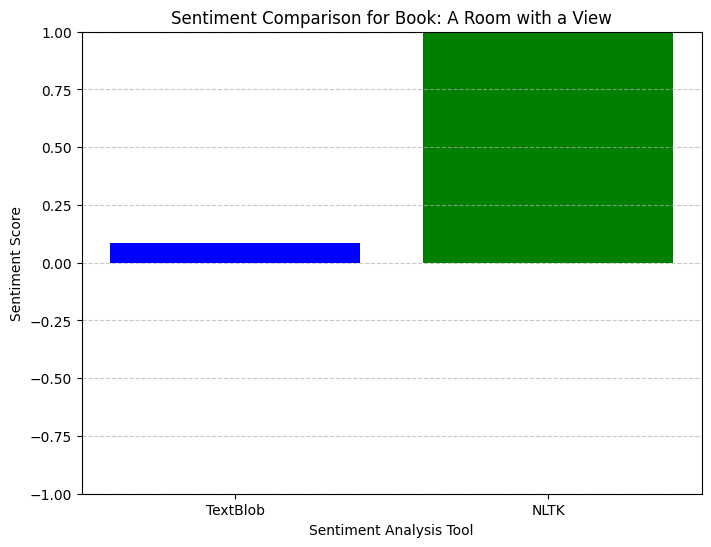

Processing book 3/32


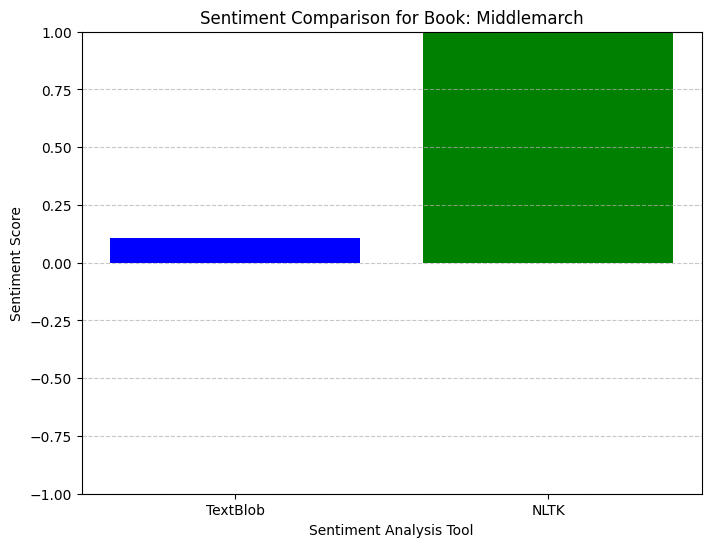

Processing book 4/32


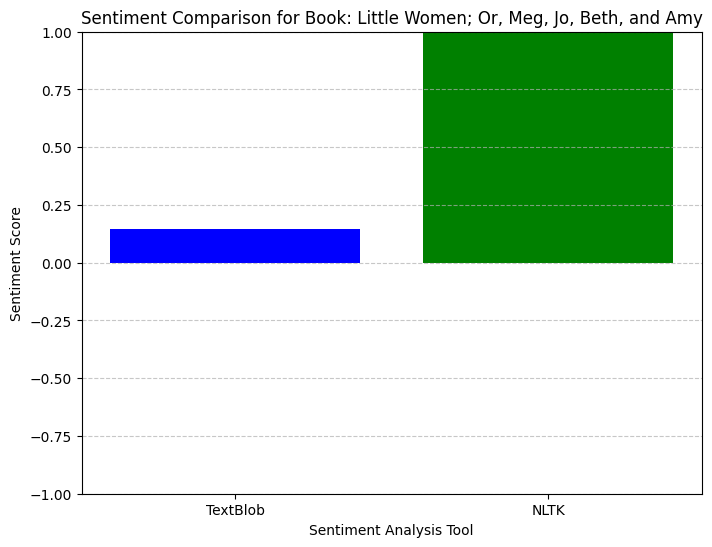

Processing book 5/32


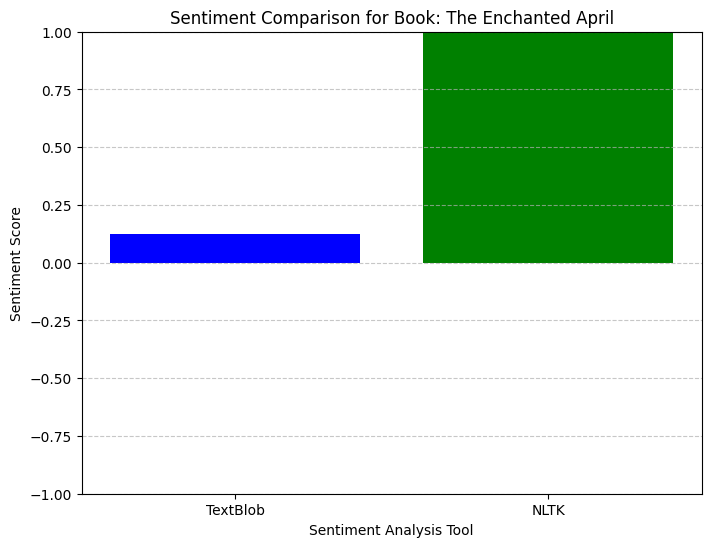

Processing book 6/32


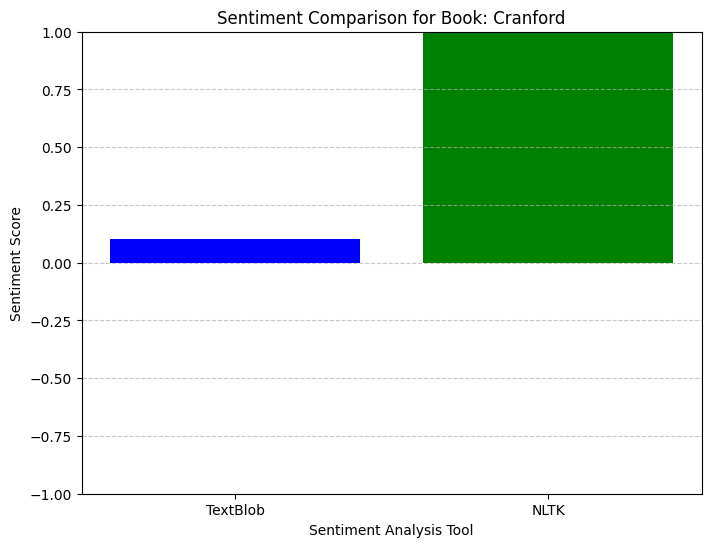

Processing book 7/32


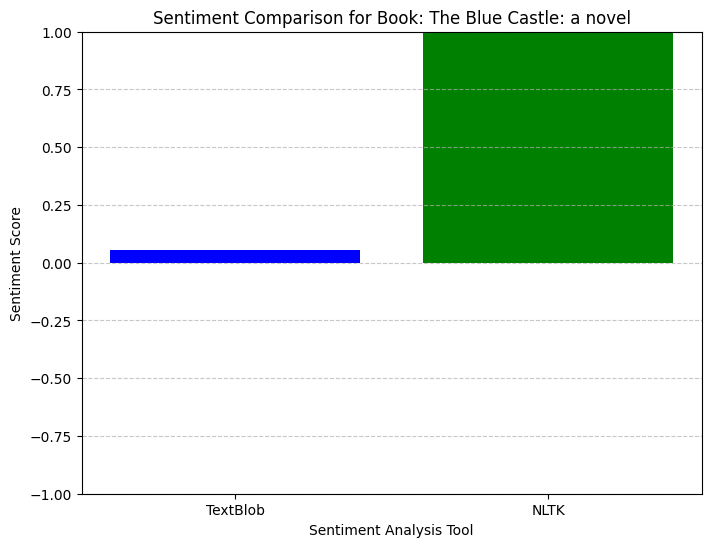

Processing book 8/32


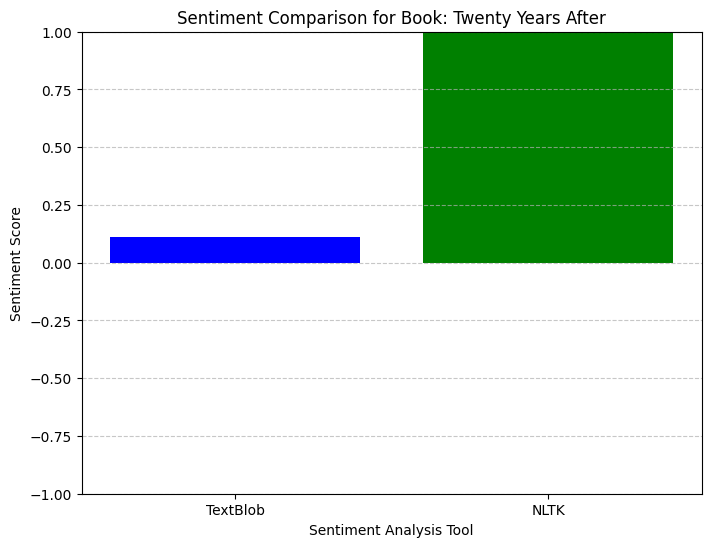

Processing book 9/32


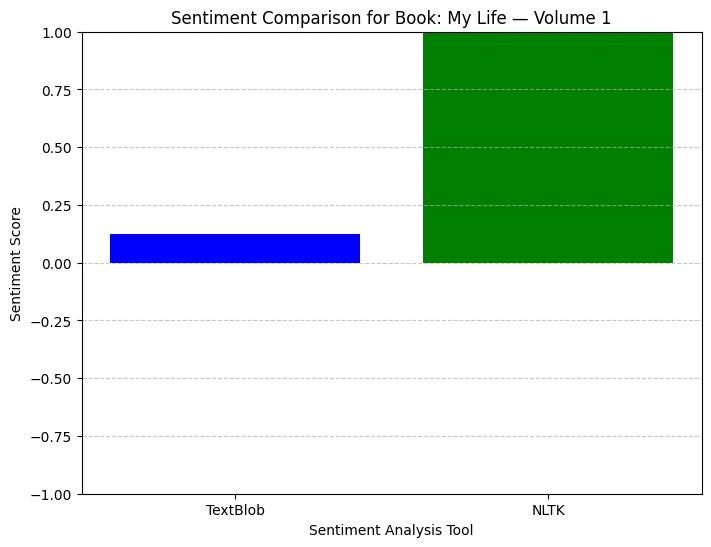

Processing book 10/32


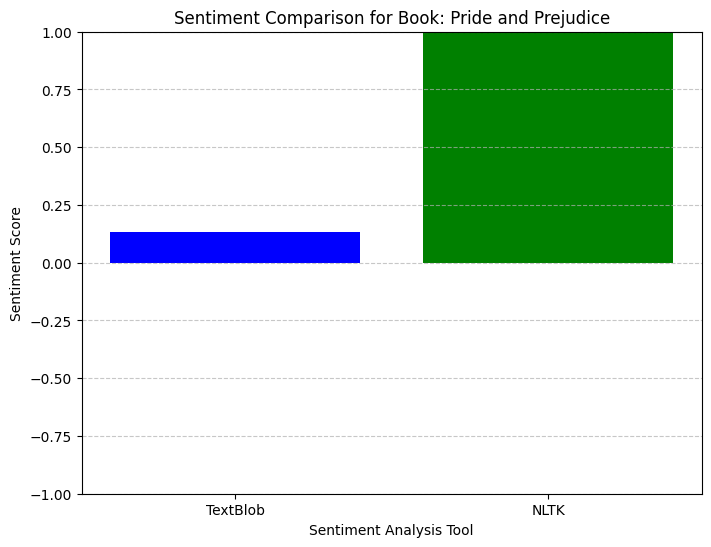

Processing book 11/32


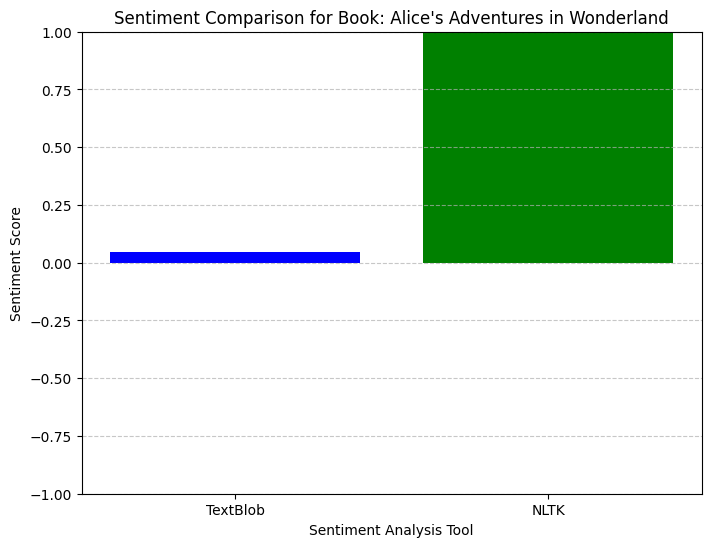

Processing book 12/32


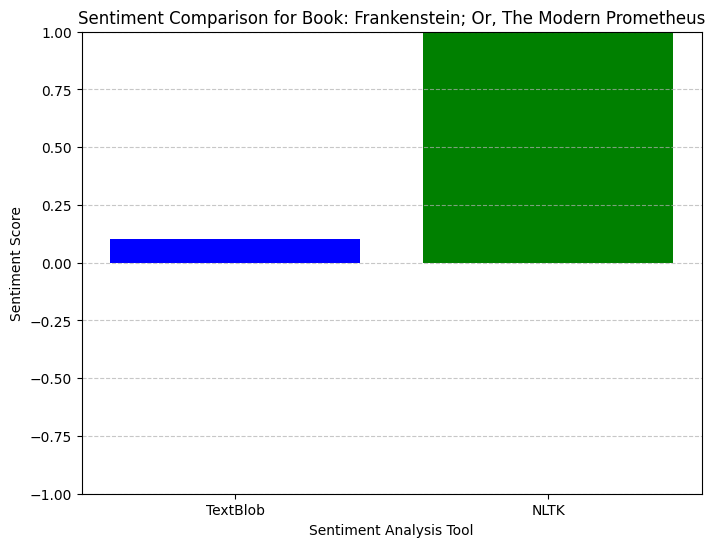

Processing book 13/32
Processing book 14/32
Processing book 15/32


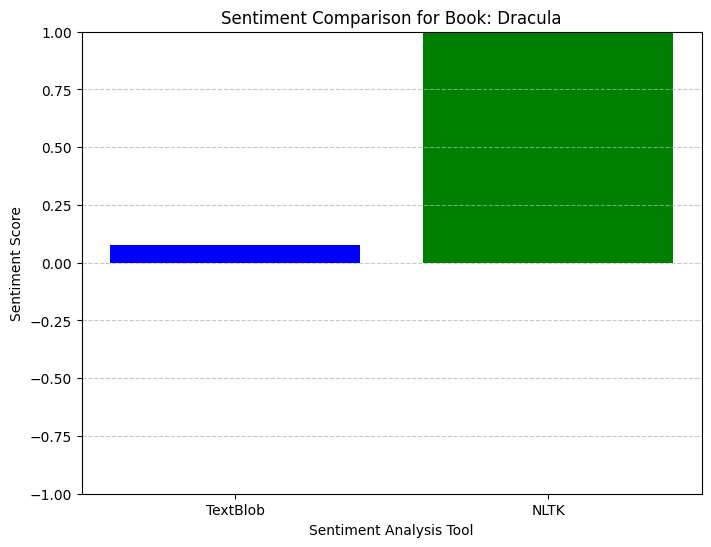

Processing book 16/32
Processing book 17/32


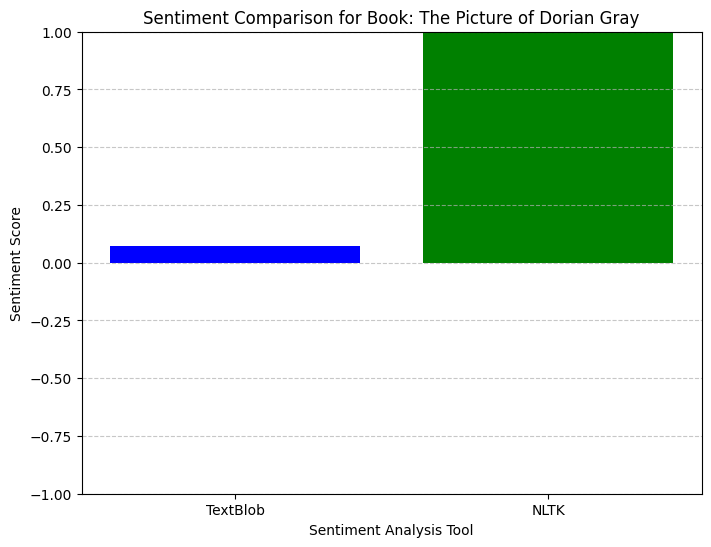

Processing book 18/32


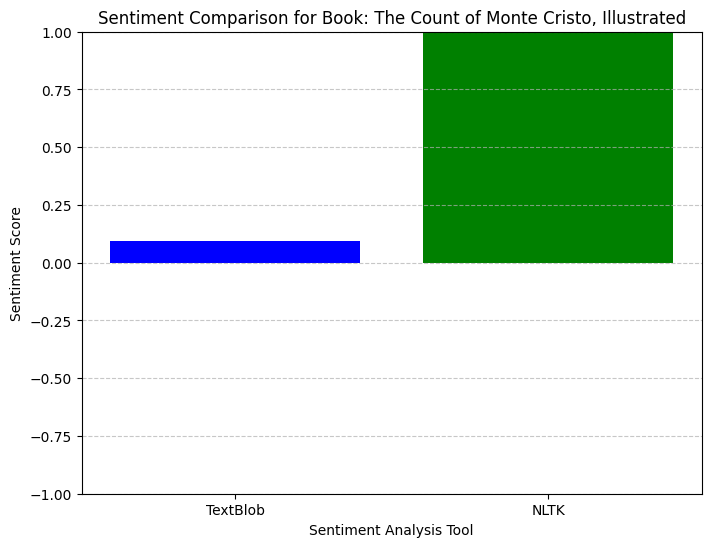

Processing book 19/32


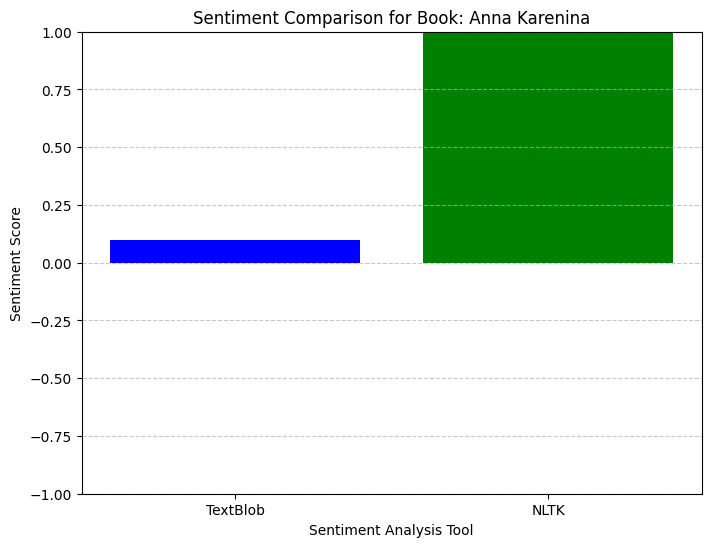

Processing book 20/32


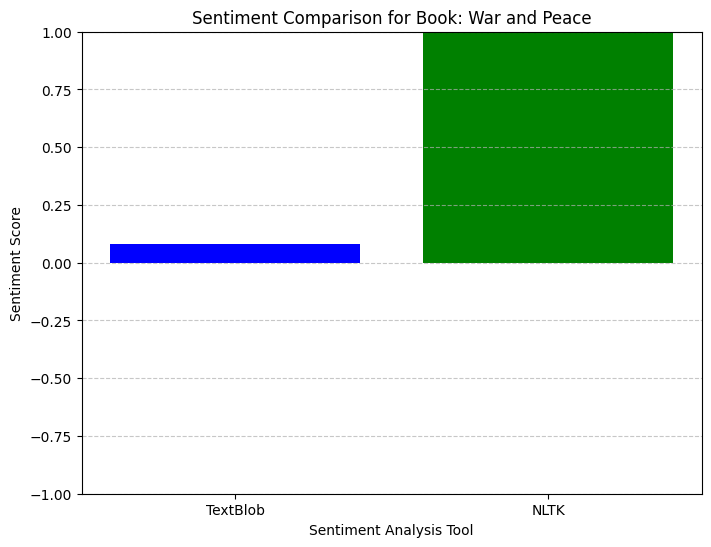

Processing book 21/32


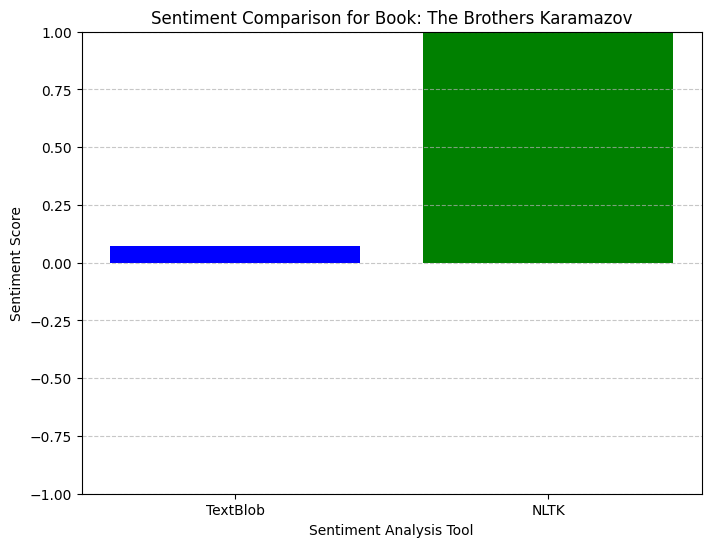

Processing book 22/32
Processing book 23/32
Processing book 24/32
Processing book 25/32
Processing book 26/32
Processing book 27/32


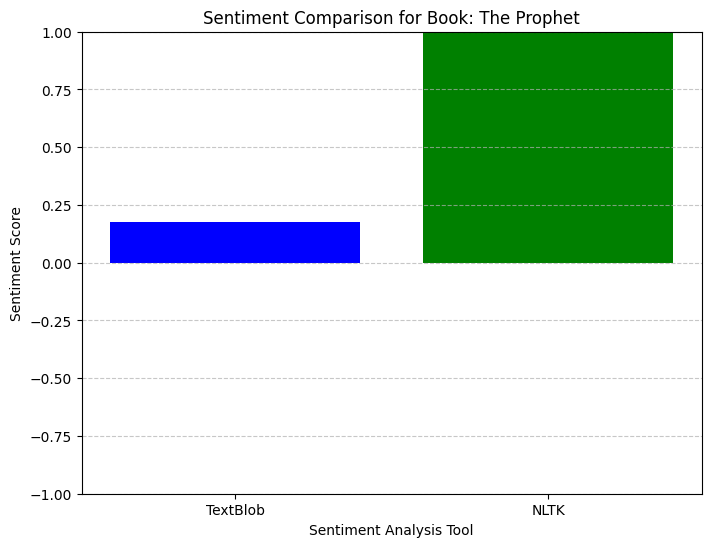

Processing book 28/32
Processing book 29/32
Processing book 30/32


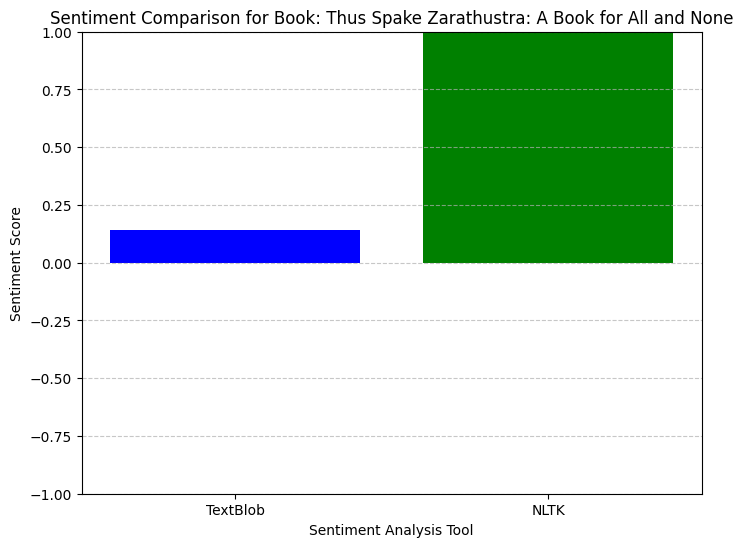

Processing book 31/32


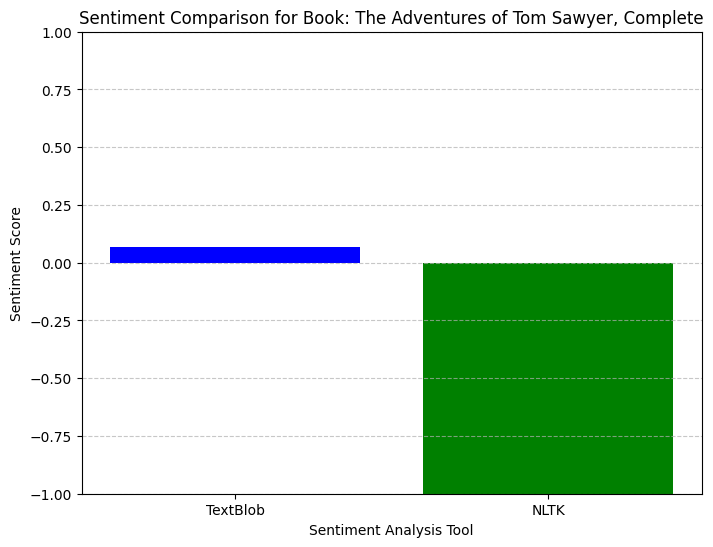

Processing book 32/32


In [2]:
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np

GUTENDEX_API_BASE_URL = 'https://gutendex.com'
author_year_start = 1808
author_year_end = 1890
gutendex_url = f'{GUTENDEX_API_BASE_URL}/books?author_year_start={author_year_start}&author_year_end={author_year_end}'

# Create a retry session for API requests
retry_strategy = Retry(
    total=5,
    backoff_factor=2,
    status_forcelist=[429, 500, 502, 503, 504],
)
adapter = HTTPAdapter(max_retries=retry_strategy)
http = requests.Session()
http.mount("https://", adapter)
http.mount("http://", adapter)

# Fetch book text using the Gutendex API
def fetch_book_text(book_id):
    url = f'{GUTENDEX_API_BASE_URL}/books/{book_id}'
    try:
        response = http.get(url)
        response.raise_for_status()
        book_data = response.json()
        return book_data.get('formats', {}).get('text/plain'), book_data
    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch book {book_id} text: {e}")
    return None, None

# Fetch all book IDs from the Gutendex API
def fetch_all_book_ids():
    try:
        response = http.get(gutendex_url)
        response.raise_for_status()
        books_data = response.json()
        return [book['id'] for book in books_data['results']]
    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch book IDs: {e}")
    return []

# Perform sentiment analysis using TextBlob
def analyze_sentiment_textblob(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

# Perform sentiment analysis using NLTK
def analyze_sentiment_nltk(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    sentiment_score = sentiment_scores['compound']
    return sentiment_score

# Get all book IDs
book_ids = fetch_all_book_ids()
for i, book_id in enumerate(book_ids):
    print(f"Processing book {i + 1}/{len(book_ids)}")
    book = {}

    text_url, book_data = fetch_book_text(book_id)
    if text_url is None:
        continue

    try:
        response = http.get(text_url)
        response.raise_for_status()
        text = response.text
    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch text for book {book_id}: {e}")
        continue

    # Perform sentiment analysis using TextBlob
    tb_sentiment = analyze_sentiment_textblob(text)

    # Perform sentiment analysis using NLTK
    nltk_sentiment = analyze_sentiment_nltk(text)

    # Create bar chart
    sentiment_scores = [tb_sentiment, nltk_sentiment]
    sentiment_tools = ['TextBlob', 'NLTK']

    plt.figure(figsize=(8, 6))
    plt.bar(sentiment_tools, sentiment_scores, color=['blue', 'green'])
    plt.xlabel('Sentiment Analysis Tool')
    plt.ylabel('Sentiment Score')
    plt.title(f'Sentiment Comparison for Book: {book_data.get("title", "Unknown Title")}')
    plt.ylim(-1, 1)  # Set y-axis limits
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [3]:
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from tabulate import tabulate
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
from statsmodels.nonparametric.smoothers_lowess import lowess

GUTENDEX_API_BASE_URL = 'https://gutendex.com'
author_year_start = 1808
author_year_end = 1890
gutendex_url = f'{GUTENDEX_API_BASE_URL}/books?author_year_start={author_year_start}&author_year_end={author_year_end}'

# Create a retry session for API requests
retry_strategy = Retry(
    total=5,
    backoff_factor=2,
    status_forcelist=[429, 500, 502, 503, 504],
)
adapter = HTTPAdapter(max_retries=retry_strategy)
http = requests.Session()
http.mount("https://", adapter)
http.mount("http://", adapter)

# Fetch book text using the Gutendex API
def fetch_book_text(book_id):
    url = f'{GUTENDEX_API_BASE_URL}/books/{book_id}'
    try:
        response = http.get(url)
        response.raise_for_status()
        book_data = response.json()
        return book_data.get('formats', {}).get('text/plain'), book_data
    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch book {book_id} text: {e}")
    return None, None

# Fetch all book IDs from the Gutendex API
def fetch_all_book_ids():
    try:
        response = http.get(gutendex_url)
        response.raise_for_status()
        books_data = response.json()
        return [book['id'] for book in books_data['results']]
    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch book IDs: {e}")
    return []

# Perform sentiment analysis using TextBlob
def analyze_sentiment_textblob(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

# Perform sentiment analysis using NLTK
def analyze_sentiment_nltk(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    sentiment_score = sentiment_scores['compound']
    return sentiment_score

# Get all book IDs
book_ids = fetch_all_book_ids()
for i, book_id in enumerate(book_ids):
    print(f"Processing book {i + 1}/{len(book_ids)}")
    book = {}

    text_url, book_data = fetch_book_text(book_id)
    if text_url is None:
        continue

    try:
        response = http.get(text_url)
        response.raise_for_status()
        text = response.text
    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch text for book {book_id}: {e}")
        continue

    # Perform sentiment analysis using TextBlob
    tb_sentiment = analyze_sentiment_textblob(text)

    # Perform sentiment analysis using NLTK
    nltk_sentiment = analyze_sentiment_nltk(text)

    # Calculate rolling mean smoothing
    sentiment_scores = [tb_sentiment, nltk_sentiment]
    rolling_mean_smooth = pd.Series(sentiment_scores).rolling(window=3, min_periods=1).mean().tolist()  # Add min_periods parameter

    # Calculate LOWESS smoothing
    x = np.arange(len(sentiment_scores))
    lowess_smooth = lowess(sentiment_scores, x, frac=0.3, return_sorted=False).tolist()

    # Display sentiment scores and smoothing for comparison
    table_data = [
        ["TextBlob Sentiment", tb_sentiment, rolling_mean_smooth[0], lowess_smooth[0]],
        ["NLTK Sentiment", nltk_sentiment, rolling_mean_smooth[1], lowess_smooth[1]]
    ]
    book_title = book_data.get('title', 'Unknown Title')
    print(f"Sentiment Comparison for Book: {book_title}")
    print(tabulate(table_data, headers=["Sentiment Analysis Tool", "Sentiment Score", "Rolling Mean Smooth", "LOWESS Smooth"], tablefmt="grid"))

Processing book 1/32
Processing book 2/32
Sentiment Comparison for Book: A Room with a View
+---------------------------+-------------------+-----------------------+-----------------+
| Sentiment Analysis Tool   |   Sentiment Score |   Rolling Mean Smooth |   LOWESS Smooth |
+===========================+===================+=======================+=================+
| TextBlob Sentiment        |          0.085388 |              0.085388 |        0.085388 |
+---------------------------+-------------------+-----------------------+-----------------+
| NLTK Sentiment            |          1        |              0.542694 |        1        |
+---------------------------+-------------------+-----------------------+-----------------+
Processing book 3/32
Sentiment Comparison for Book: Middlemarch
+---------------------------+-------------------+-----------------------+-----------------+
| Sentiment Analysis Tool   |   Sentiment Score |   Rolling Mean Smooth |   LOWESS Smooth |
+===============

Processing book 1/32
Processing book 2/32
Sentiment Comparison for Book: A Room with a View
+---------------------------+-------------------+-----------------------+-----------------+
| Sentiment Analysis Tool   |   Sentiment Score |   Rolling Mean Smooth |   LOWESS Smooth |
+===========================+===================+=======================+=================+
| TextBlob Sentiment        |          0.085388 |              0.085388 |        0.085388 |
+---------------------------+-------------------+-----------------------+-----------------+
| NLTK Sentiment            |          1        |              0.542694 |        1        |
+---------------------------+-------------------+-----------------------+-----------------+


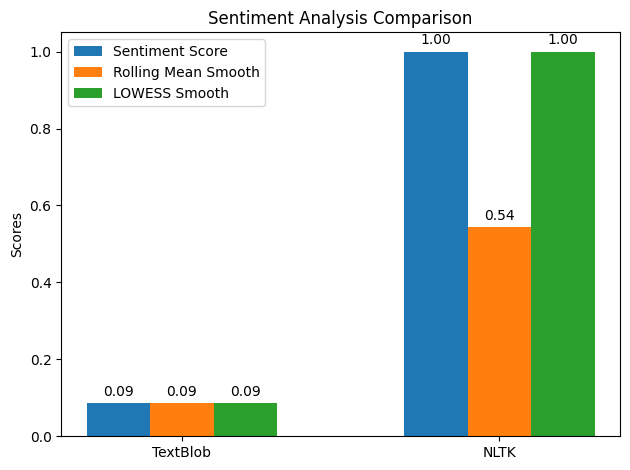

Processing book 3/32
Sentiment Comparison for Book: Middlemarch
+---------------------------+-------------------+-----------------------+-----------------+
| Sentiment Analysis Tool   |   Sentiment Score |   Rolling Mean Smooth |   LOWESS Smooth |
+===========================+===================+=======================+=================+
| TextBlob Sentiment        |          0.106252 |              0.106252 |        0.106252 |
+---------------------------+-------------------+-----------------------+-----------------+
| NLTK Sentiment            |          1        |              0.553126 |        1        |
+---------------------------+-------------------+-----------------------+-----------------+


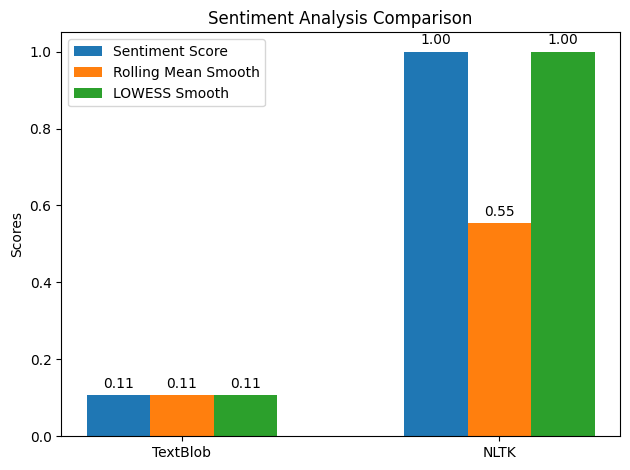

Processing book 4/32
Sentiment Comparison for Book: Little Women; Or, Meg, Jo, Beth, and Amy
+---------------------------+-------------------+-----------------------+-----------------+
| Sentiment Analysis Tool   |   Sentiment Score |   Rolling Mean Smooth |   LOWESS Smooth |
+===========================+===================+=======================+=================+
| TextBlob Sentiment        |          0.145434 |              0.145434 |        0.145434 |
+---------------------------+-------------------+-----------------------+-----------------+
| NLTK Sentiment            |          1        |              0.572717 |        1        |
+---------------------------+-------------------+-----------------------+-----------------+


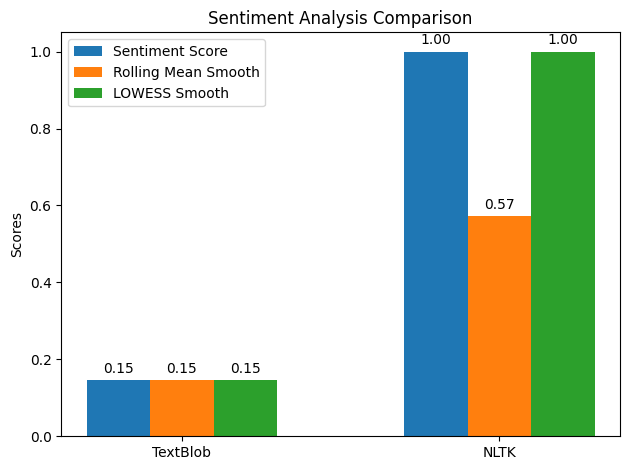

Processing book 5/32
Sentiment Comparison for Book: The Enchanted April
+---------------------------+-------------------+-----------------------+-----------------+
| Sentiment Analysis Tool   |   Sentiment Score |   Rolling Mean Smooth |   LOWESS Smooth |
+===========================+===================+=======================+=================+
| TextBlob Sentiment        |          0.123653 |              0.123653 |        0.123653 |
+---------------------------+-------------------+-----------------------+-----------------+
| NLTK Sentiment            |          1        |              0.561827 |        1        |
+---------------------------+-------------------+-----------------------+-----------------+


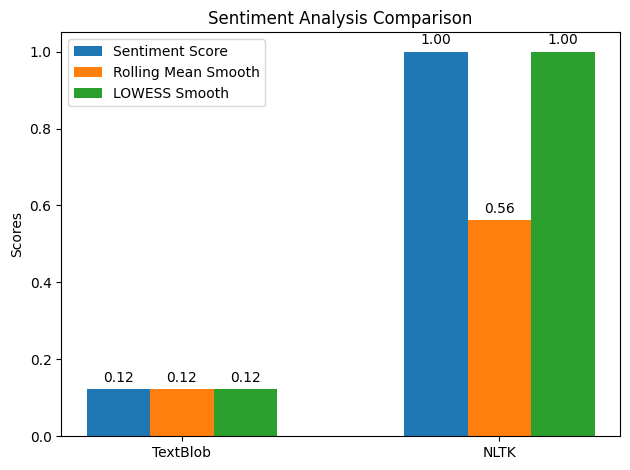

Processing book 6/32
Sentiment Comparison for Book: Cranford
+---------------------------+-------------------+-----------------------+-----------------+
| Sentiment Analysis Tool   |   Sentiment Score |   Rolling Mean Smooth |   LOWESS Smooth |
+===========================+===================+=======================+=================+
| TextBlob Sentiment        |          0.101158 |              0.101158 |        0.101158 |
+---------------------------+-------------------+-----------------------+-----------------+
| NLTK Sentiment            |          1        |              0.550579 |        1        |
+---------------------------+-------------------+-----------------------+-----------------+


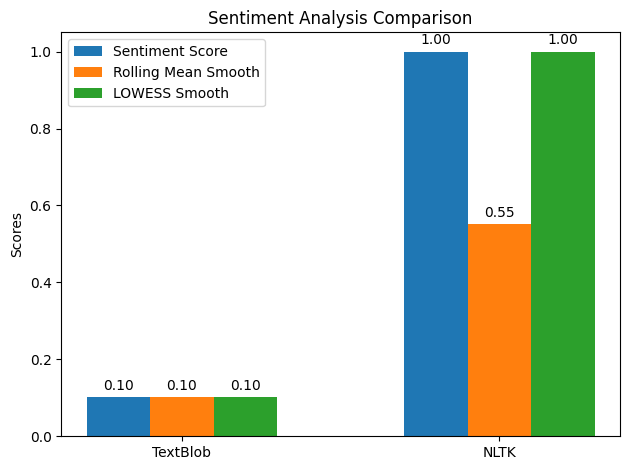

Processing book 7/32
Sentiment Comparison for Book: The Blue Castle: a novel
+---------------------------+-------------------+-----------------------+-----------------+
| Sentiment Analysis Tool   |   Sentiment Score |   Rolling Mean Smooth |   LOWESS Smooth |
+===========================+===================+=======================+=================+
| TextBlob Sentiment        |         0.0534136 |             0.0534136 |       0.0534136 |
+---------------------------+-------------------+-----------------------+-----------------+
| NLTK Sentiment            |         1         |             0.526707  |       1         |
+---------------------------+-------------------+-----------------------+-----------------+


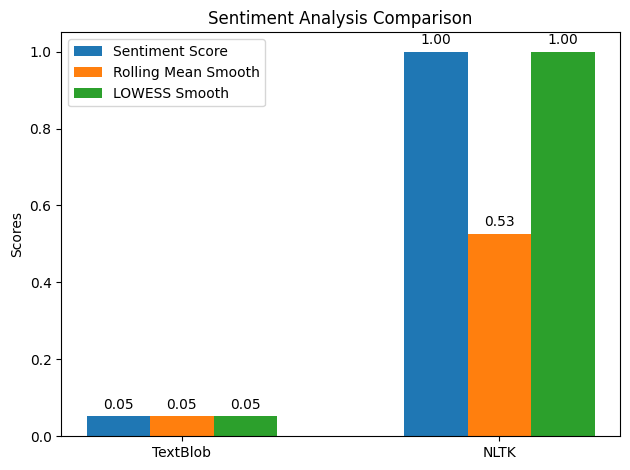

Processing book 8/32
Sentiment Comparison for Book: Twenty Years After
+---------------------------+-------------------+-----------------------+-----------------+
| Sentiment Analysis Tool   |   Sentiment Score |   Rolling Mean Smooth |   LOWESS Smooth |
+===========================+===================+=======================+=================+
| TextBlob Sentiment        |           0.11247 |              0.11247  |         0.11247 |
+---------------------------+-------------------+-----------------------+-----------------+
| NLTK Sentiment            |           1       |              0.556235 |         1       |
+---------------------------+-------------------+-----------------------+-----------------+


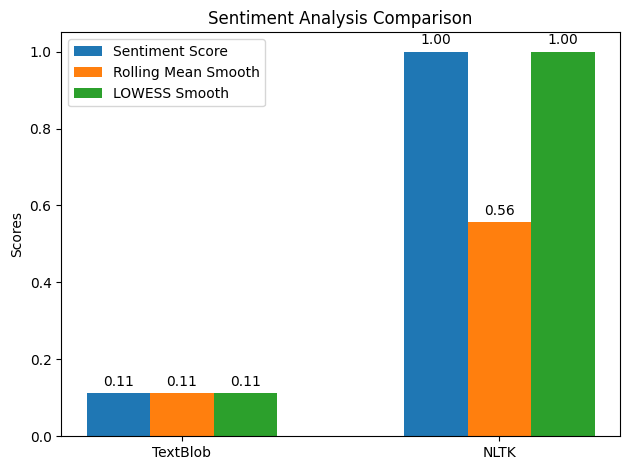

Processing book 9/32
Sentiment Comparison for Book: My Life — Volume 1
+---------------------------+-------------------+-----------------------+-----------------+
| Sentiment Analysis Tool   |   Sentiment Score |   Rolling Mean Smooth |   LOWESS Smooth |
+===========================+===================+=======================+=================+
| TextBlob Sentiment        |          0.126374 |              0.126374 |        0.126374 |
+---------------------------+-------------------+-----------------------+-----------------+
| NLTK Sentiment            |          1        |              0.563187 |        1        |
+---------------------------+-------------------+-----------------------+-----------------+


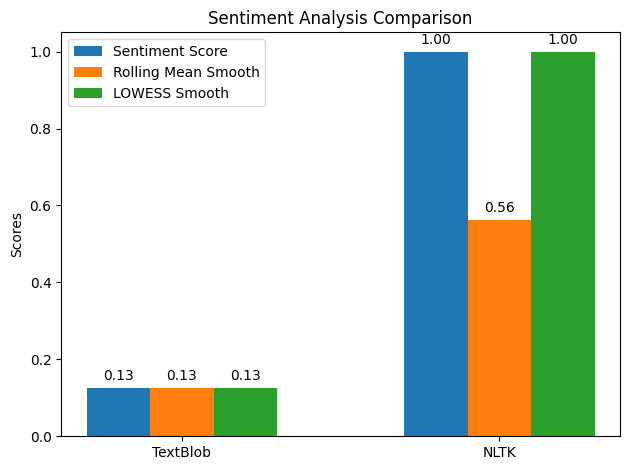

Processing book 10/32
Sentiment Comparison for Book: Pride and Prejudice
+---------------------------+-------------------+-----------------------+-----------------+
| Sentiment Analysis Tool   |   Sentiment Score |   Rolling Mean Smooth |   LOWESS Smooth |
+===========================+===================+=======================+=================+
| TextBlob Sentiment        |          0.133728 |              0.133728 |        0.133728 |
+---------------------------+-------------------+-----------------------+-----------------+
| NLTK Sentiment            |          1        |              0.566864 |        1        |
+---------------------------+-------------------+-----------------------+-----------------+


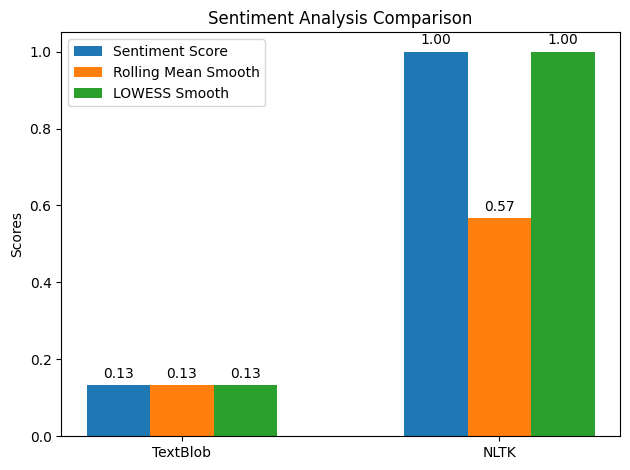

Processing book 11/32
Sentiment Comparison for Book: Alice's Adventures in Wonderland
+---------------------------+-------------------+-----------------------+-----------------+
| Sentiment Analysis Tool   |   Sentiment Score |   Rolling Mean Smooth |   LOWESS Smooth |
+===========================+===================+=======================+=================+
| TextBlob Sentiment        |         0.0464447 |             0.0464447 |       0.0464447 |
+---------------------------+-------------------+-----------------------+-----------------+
| NLTK Sentiment            |         0.9999    |             0.523172  |       0.9999    |
+---------------------------+-------------------+-----------------------+-----------------+


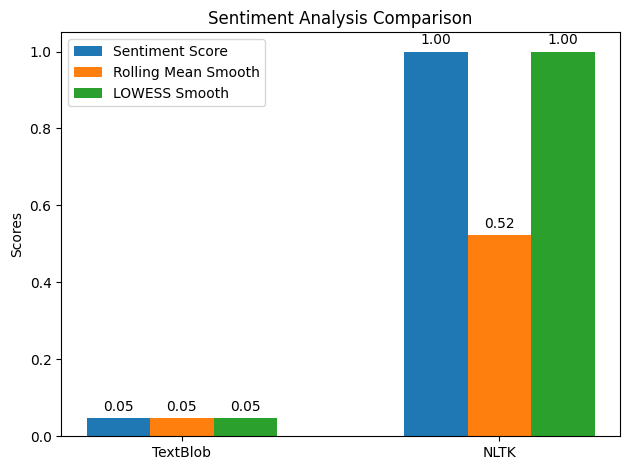

Processing book 12/32
Sentiment Comparison for Book: Frankenstein; Or, The Modern Prometheus
+---------------------------+-------------------+-----------------------+-----------------+
| Sentiment Analysis Tool   |   Sentiment Score |   Rolling Mean Smooth |   LOWESS Smooth |
+===========================+===================+=======================+=================+
| TextBlob Sentiment        |           0.10128 |               0.10128 |         0.10128 |
+---------------------------+-------------------+-----------------------+-----------------+
| NLTK Sentiment            |           1       |               0.55064 |         1       |
+---------------------------+-------------------+-----------------------+-----------------+


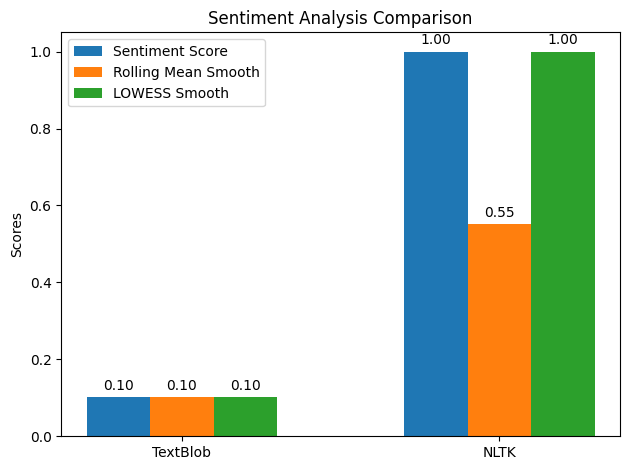

Processing book 13/32
Processing book 14/32
Processing book 15/32
Sentiment Comparison for Book: Dracula
+---------------------------+-------------------+-----------------------+-----------------+
| Sentiment Analysis Tool   |   Sentiment Score |   Rolling Mean Smooth |   LOWESS Smooth |
+===========================+===================+=======================+=================+
| TextBlob Sentiment        |         0.0758367 |             0.0758367 |       0.0758367 |
+---------------------------+-------------------+-----------------------+-----------------+
| NLTK Sentiment            |         1         |             0.537918  |       1         |
+---------------------------+-------------------+-----------------------+-----------------+


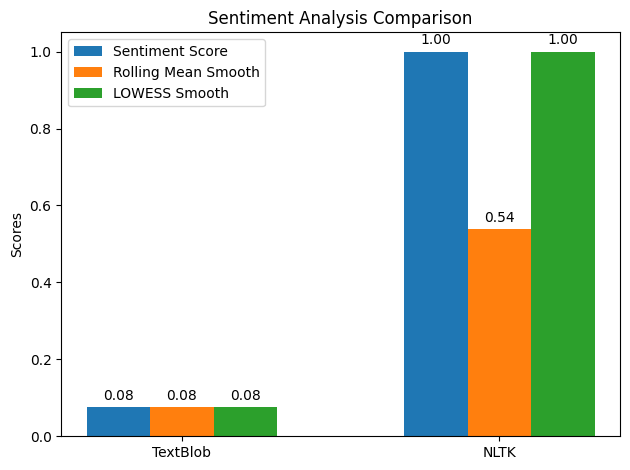

Processing book 16/32
Processing book 17/32
Sentiment Comparison for Book: The Picture of Dorian Gray
+---------------------------+-------------------+-----------------------+-----------------+
| Sentiment Analysis Tool   |   Sentiment Score |   Rolling Mean Smooth |   LOWESS Smooth |
+===========================+===================+=======================+=================+
| TextBlob Sentiment        |         0.0710206 |             0.0710206 |       0.0710206 |
+---------------------------+-------------------+-----------------------+-----------------+
| NLTK Sentiment            |         1         |             0.53551   |       1         |
+---------------------------+-------------------+-----------------------+-----------------+


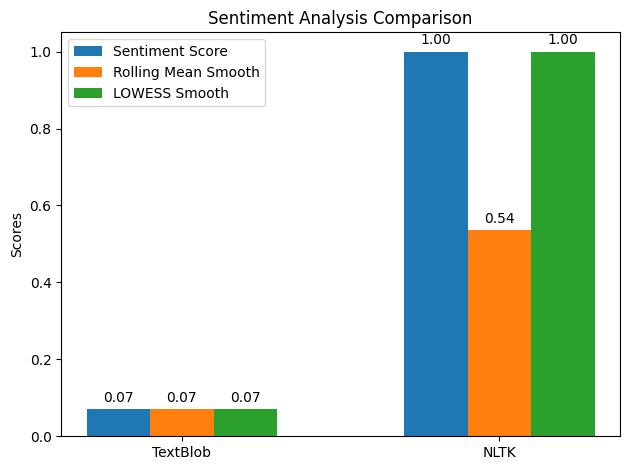

Processing book 18/32
Sentiment Comparison for Book: The Count of Monte Cristo, Illustrated
+---------------------------+-------------------+-----------------------+-----------------+
| Sentiment Analysis Tool   |   Sentiment Score |   Rolling Mean Smooth |   LOWESS Smooth |
+===========================+===================+=======================+=================+
| TextBlob Sentiment        |         0.0932232 |             0.0932232 |       0.0932232 |
+---------------------------+-------------------+-----------------------+-----------------+
| NLTK Sentiment            |         1         |             0.546612  |       1         |
+---------------------------+-------------------+-----------------------+-----------------+


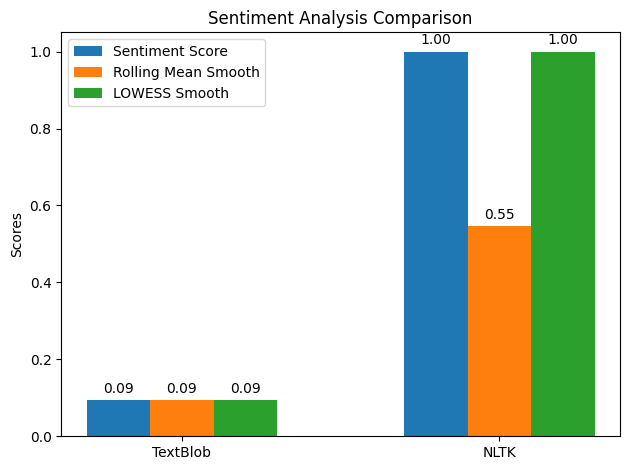

Processing book 19/32
Sentiment Comparison for Book: Anna Karenina
+---------------------------+-------------------+-----------------------+-----------------+
| Sentiment Analysis Tool   |   Sentiment Score |   Rolling Mean Smooth |   LOWESS Smooth |
+===========================+===================+=======================+=================+
| TextBlob Sentiment        |          0.100214 |              0.100214 |        0.100214 |
+---------------------------+-------------------+-----------------------+-----------------+
| NLTK Sentiment            |          1        |              0.550107 |        1        |
+---------------------------+-------------------+-----------------------+-----------------+


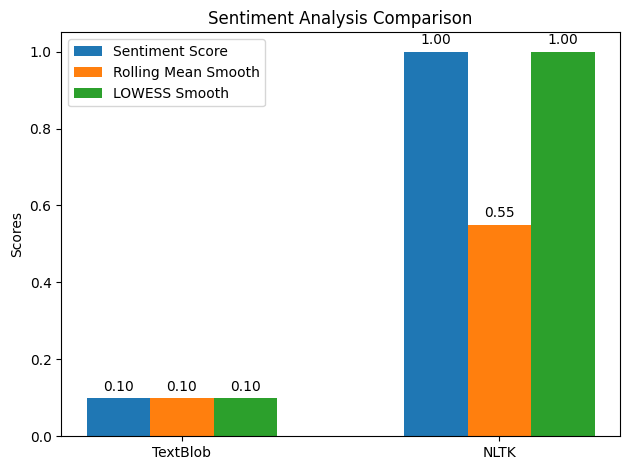

Processing book 20/32
Sentiment Comparison for Book: War and Peace
+---------------------------+-------------------+-----------------------+-----------------+
| Sentiment Analysis Tool   |   Sentiment Score |   Rolling Mean Smooth |   LOWESS Smooth |
+===========================+===================+=======================+=================+
| TextBlob Sentiment        |         0.0826216 |             0.0826216 |       0.0826216 |
+---------------------------+-------------------+-----------------------+-----------------+
| NLTK Sentiment            |         1         |             0.541311  |       1         |
+---------------------------+-------------------+-----------------------+-----------------+


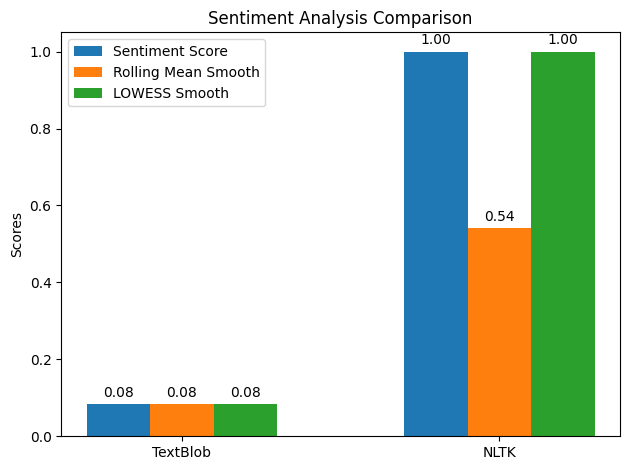

Processing book 21/32
Sentiment Comparison for Book: The Brothers Karamazov
+---------------------------+-------------------+-----------------------+-----------------+
| Sentiment Analysis Tool   |   Sentiment Score |   Rolling Mean Smooth |   LOWESS Smooth |
+===========================+===================+=======================+=================+
| TextBlob Sentiment        |         0.0705581 |             0.0705581 |       0.0705581 |
+---------------------------+-------------------+-----------------------+-----------------+
| NLTK Sentiment            |         1         |             0.535279  |       1         |
+---------------------------+-------------------+-----------------------+-----------------+


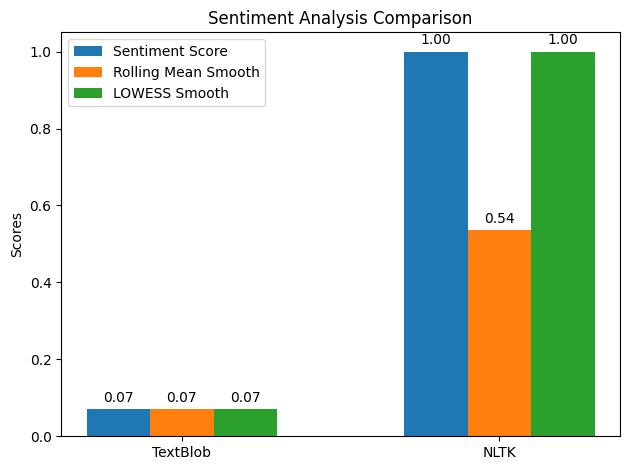

Processing book 22/32
Processing book 23/32
Processing book 24/32
Processing book 25/32
Processing book 26/32
Processing book 27/32
Sentiment Comparison for Book: The Prophet
+---------------------------+-------------------+-----------------------+-----------------+
| Sentiment Analysis Tool   |   Sentiment Score |   Rolling Mean Smooth |   LOWESS Smooth |
+===========================+===================+=======================+=================+
| TextBlob Sentiment        |          0.174328 |              0.174328 |        0.174328 |
+---------------------------+-------------------+-----------------------+-----------------+
| NLTK Sentiment            |          1        |              0.587164 |        1        |
+---------------------------+-------------------+-----------------------+-----------------+


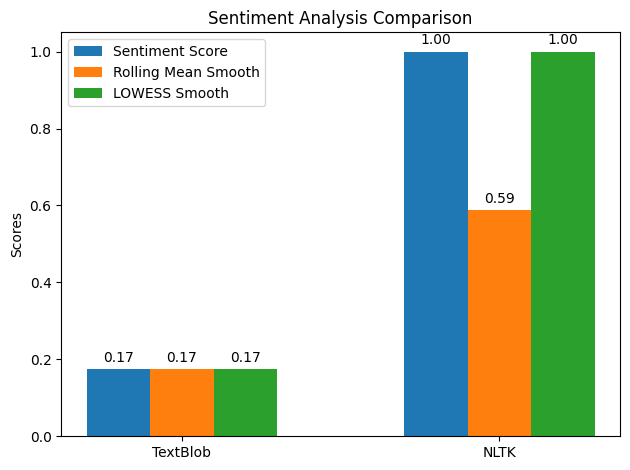

Processing book 28/32
Processing book 29/32
Processing book 30/32
Sentiment Comparison for Book: Thus Spake Zarathustra: A Book for All and None
+---------------------------+-------------------+-----------------------+-----------------+
| Sentiment Analysis Tool   |   Sentiment Score |   Rolling Mean Smooth |   LOWESS Smooth |
+===========================+===================+=======================+=================+
| TextBlob Sentiment        |          0.141991 |              0.141991 |        0.141991 |
+---------------------------+-------------------+-----------------------+-----------------+
| NLTK Sentiment            |          1        |              0.570996 |        1        |
+---------------------------+-------------------+-----------------------+-----------------+


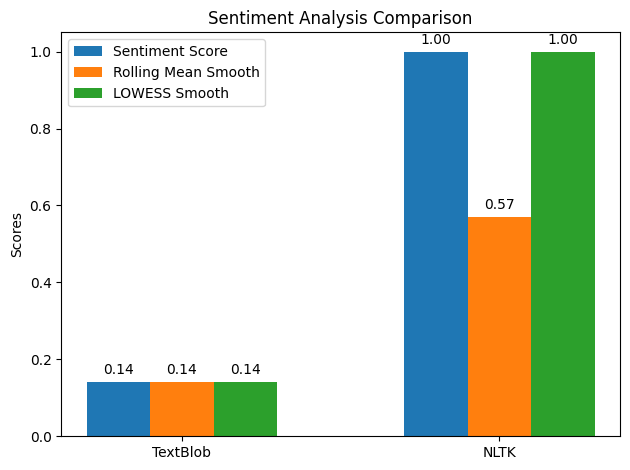

Processing book 31/32
Sentiment Comparison for Book: The Adventures of Tom Sawyer, Complete
+---------------------------+-------------------+-----------------------+-----------------+
| Sentiment Analysis Tool   |   Sentiment Score |   Rolling Mean Smooth |   LOWESS Smooth |
+===========================+===================+=======================+=================+
| TextBlob Sentiment        |         0.0665895 |             0.0665895 |       0.0665895 |
+---------------------------+-------------------+-----------------------+-----------------+
| NLTK Sentiment            |        -0.9999    |            -0.466655  |      -0.9999    |
+---------------------------+-------------------+-----------------------+-----------------+


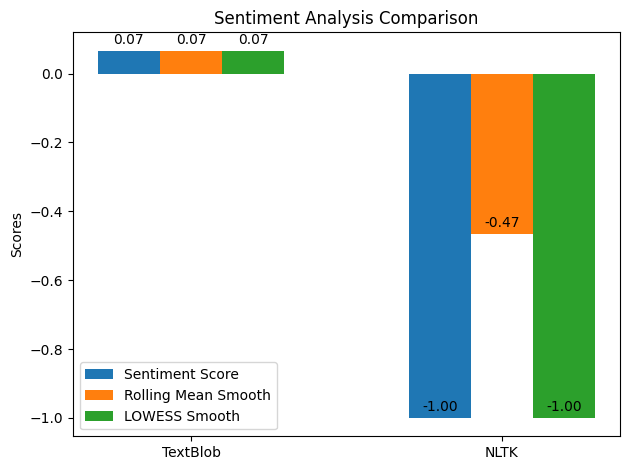

Processing book 32/32


In [4]:
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from tabulate import tabulate
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.pyplot as plt

# Define constants
GUTENDEX_API_BASE_URL = 'https://gutendex.com'
author_year_start = 1808
author_year_end = 1890
gutendex_url = f'{GUTENDEX_API_BASE_URL}/books?author_year_start={author_year_start}&author_year_end={author_year_end}'

# Create a retry session for API requests
retry_strategy = Retry(
    total=5,
    backoff_factor=2,
    status_forcelist=[429, 500, 502, 503, 504],
)
adapter = HTTPAdapter(max_retries=retry_strategy)
http = requests.Session()
http.mount("https://", adapter)
http.mount("http://", adapter)

def fetch_book_text(book_id):
    url = f'{GUTENDEX_API_BASE_URL}/books/{book_id}'
    try:
        response = http.get(url)
        response.raise_for_status()
        book_data = response.json()
        return book_data.get('formats', {}).get('text/plain'), book_data
    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch book {book_id} text: {e}")
    return None, None

# Fetch all book IDs from the Gutendex API
def fetch_all_book_ids():
    try:
        response = http.get(gutendex_url)
        response.raise_for_status()
        books_data = response.json()
        return [book['id'] for book in books_data['results']]
    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch book IDs: {e}")
    return []

# Perform sentiment analysis using TextBlob
def analyze_sentiment_textblob(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

# Perform sentiment analysis using NLTK
def analyze_sentiment_nltk(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    sentiment_score = sentiment_scores['compound']
    return sentiment_score
# Get all book IDs
book_ids = fetch_all_book_ids()
for i, book_id in enumerate(book_ids):
    print(f"Processing book {i + 1}/{len(book_ids)}")
    book = {}

    text_url, book_data = fetch_book_text(book_id)
    if text_url is None:
        continue

    try:
        response = http.get(text_url)
        response.raise_for_status()
        text = response.text
    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch text for book {book_id}: {e}")
        continue

    # Perform sentiment analysis using TextBlob
    tb_sentiment = analyze_sentiment_textblob(text)

    # Perform sentiment analysis using NLTK
    nltk_sentiment = analyze_sentiment_nltk(text)

    # Calculate rolling mean smoothing
    sentiment_scores = [tb_sentiment, nltk_sentiment]
    rolling_mean_smooth = pd.Series(sentiment_scores).rolling(window=3, min_periods=1).mean().tolist()

    # Calculate LOWESS smoothing
    x = np.arange(len(sentiment_scores))
    lowess_smooth = lowess(sentiment_scores, x, frac=0.3, return_sorted=False).tolist()

    # Display sentiment scores and smoothing for comparison
    table_data = [
        ["TextBlob Sentiment", tb_sentiment, rolling_mean_smooth[0], lowess_smooth[0]],
        ["NLTK Sentiment", nltk_sentiment, rolling_mean_smooth[1], lowess_smooth[1]]
    ]
    book_title = book_data.get('title', 'Unknown Title')
    print(f"Sentiment Comparison for Book: {book_title}")
    print(tabulate(table_data, headers=["Sentiment Analysis Tool", "Sentiment Score", "Rolling Mean Smooth", "LOWESS Smooth"], tablefmt="grid"))

    # Plotting bar chart
    tools = ["TextBlob", "NLTK"]
    sentiment_scores = [tb_sentiment, nltk_sentiment]
    rolling_mean_scores = [rolling_mean_smooth[0], rolling_mean_smooth[1]]
    lowess_smooth_scores = [lowess_smooth[0], lowess_smooth[1]]

    x = np.arange(len(tools))
    width = 0.2

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, sentiment_scores, width, label='Sentiment Score')
    rects2 = ax.bar(x, rolling_mean_scores, width, label='Rolling Mean Smooth')
    rects3 = ax.bar(x + width, lowess_smooth_scores, width, label='LOWESS Smooth')

    ax.set_ylabel('Scores')
    ax.set_title('Sentiment Analysis Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(tools)
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('%.2f' % height,
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    fig.tight_layout()

    plt.show()